Đọc dữ liệu từ file 

In [1]:
import pandas as pd   

df = pd.read_csv('data_proccessed/chungcu_preprocess.csv')
df.head()

,Link,Giá tổng,Giá/m²,Số phòng ngủ,Số phòng vệ sinh,Giấy tờ pháp lý,Loại hình căn hộ,Diện tích,Hướng cửa chính,Hướng ban công,Tình trạng nội thất,Xã/Phường,Quận/Huyện
0,https://www.nhatot.com/mua-ban-can-ho-chung-cu...,3.28,50.46,2,2,Sổ hồng riêng,Tập thể,65.0,NaN,NaN,Nội thất đầy đủ,Ngọc Khánh,Ba Đình
1,https://www.nhatot.com/mua-ban-can-ho-chung-cu...,1.65,33.00,2,1,Sổ hồng riêng,Chung cư,50.0,NaN,NaN,Nội thất cao cấp,Quang Trung,Đống Đa
2,https://www.nhatot.com/mua-ban-can-ho-chung-cu...,2.86,42.06,2,1,Sổ hồng riêng,Tập thể,68.0,NaN,NaN,Nội thất đầy đủ,Thanh Xuân Bắc,Thanh Xuân
3,https://www.nhatot.com/mua-ban-can-ho-chung-cu...,1.86,33.82,2,1,Sổ hồng riêng,Chung cư mini,55.0,NaN,NaN,Hoàn thiện cơ bản,Nhân Chính,Thanh Xuân
4,https://www.nhatot.com/mua-ban-can-ho-chung-cu...,2.50,41.67,2,1,Sổ hồng riêng,Chung cư,60.0,NaN,NaN,Nội thất đầy đủ,Trâu Quỳ,Gia Lâm


In [2]:
df.count()

Link                   2263
Giá tổng               2263
Giá/m²                 2263
Số phòng ngủ           2263
Số phòng vệ sinh       2263
Giấy tờ pháp lý        2263
Loại hình căn hộ       2263
Diện tích              2263
Hướng cửa chính         526
Hướng ban công          596
Tình trạng nội thất    2263
Xã/Phường              2263
Quận/Huyện             2263
dtype: int64

Dữ liệu từ các trường hầu như đã được xử lí đầy đủ.

In [ ]:
df['Giấy tờ pháp lý'].value_counts()

Giấy tờ pháp lý
Sổ hồng riêng       1975
Hợp đồng mua bán     227
Đang chờ sổ           47
Hợp đồng đặt cọc      14
Name: count, dtype: int64

In [5]:
df['Loại hình căn hộ'].value_counts()

Loại hình căn hộ
Chung cư         1757
Tập thể           313
Chung cư mini     171
Duplex              8
Officetel           8
Penthouse           6
Name: count, dtype: int64

In [7]:
df['Tình trạng nội thất'].value_counts()

Tình trạng nội thất
Nội thất đầy đủ      1160
Nội thất cao cấp      699
Hoàn thiện cơ bản     377
Bàn giao thô           27
Name: count, dtype: int64

In [8]:
df['Xã/Phường'].value_counts()

Xã/Phường
Trâu Quỳ      376
Tây Mỗ        282
Hoàng Liệt     64
Đại Kim        62
Mỹ Đình 2      53
             ... 
Ngọc Hồi        1
Hàng Mã         1
Hữu Hoà         1
Yên Hòa         1
Vĩnh Quỳnh      1
Name: count, Length: 170, dtype: int64

In [17]:
df['Số phòng ngủ'].value_counts()

Số phòng ngủ
2     1169
3      621
1      341
10      67
4       38
5       13
8        6
9        6
7        1
6        1
Name: count, dtype: int64

In [9]:
df['Quận/Huyện'].value_counts()

Quận/Huyện
Nam Từ Liêm     457
Gia Lâm         442
Hoàng Mai       260
Đống Đa         161
Cầu Giấy        158
Thanh Xuân      155
Hai Bà Trưng    153
Hà Đông         150
Bắc Từ Liêm      92
Long Biên        56
Ba Đình          46
Tây Hồ           38
Thanh Trì        32
Hoài Đức         19
Trống            13
Hoàn Kiếm        11
Đông Anh         11
Đan Phượng        5
Chương Mỹ         2
Thanh Oai         1
Mê Linh           1
Name: count, dtype: int64

In [11]:
df['Giá/m²'].describe()

count    2263.000000
mean       57.276836
std        38.421083
min         0.014035
25%        42.500000
50%        50.460000
75%        63.530000
max       464.910000
Name: Giá/m², dtype: float64

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

Phân bố của giá

In [5]:
fig = px.histogram(df, x='Giá/m²', nbins=60, template="plotly")
fig.update_layout(title="Distribution of Price")
fig.show()

Phụ thuộc của giá vào số phòng ngủ

In [15]:
fig = px.histogram(df, x="Giá/m²", color="Số phòng ngủ", nbins=20)
fig.update_layout(title="Distribution of Price by Bed", xaxis_title="Giá/m2", yaxis_title="Count")
fig.show()

In [16]:
df.groupby('Số phòng ngủ', as_index=False).agg({'Giá/m²' : 'mean'}).sort_values('Giá/m²', ascending=False)

,Số phòng ngủ,Giá/m²
9,10,221.942537
5,6,212.500000
7,8,196.705000
8,9,187.661667
6,7,171.700000
4,5,83.727692
3,4,70.628013
0,1,57.051144
2,3,52.444613
1,2,48.128367


In [18]:
df_mean = df.groupby('Số phòng ngủ')['Giá/m²'].mean().reset_index()

# plot mean price per acre lot
fig = px.scatter(df_mean, x='Số phòng ngủ', y='Giá/m²', trendline='ols')
fig.update_layout(title='Average Price per Số phòng ngủ', xaxis_title='Số phòng ngủ', yaxis_title='Giá/m²')
fig.show()

Phụ thuộc của giá vào diện tích 

In [32]:
df_mean

,Diện tích,Giá/m²
0,17.0,194.12000
1,18.0,161.94500
2,20.0,108.75000
3,22.0,32.73000
4,23.0,107.61000
...,...,...
233,235.0,110.21000
234,245.0,65.31000
235,276.0,34.42000
236,500.0,56.00000


In [39]:
df_test = df_mean[df_mean['Diện tích'] != 5031.0]
df_test

,Diện tích,Giá/m²
0,17.0,194.120
1,18.0,161.945
2,20.0,108.750
3,22.0,32.730
4,23.0,107.610
...,...,...
232,230.0,47.830
233,235.0,110.210
234,245.0,65.310
235,276.0,34.420


In [40]:
# df_test = df.groupby('Diện tích')['Giá/m²'].mean().reset_index()

# plot mean price per acre lot
fig = px.scatter(df_test, x='Diện tích', y='Giá/m²', trendline='ols')
fig.update_layout(title='Average Price per Diện tích', xaxis_title='Diện tích', yaxis_title='Giá/m²')
fig.show()

Phụ thuộc của giá vào quận/huyện

In [23]:
df_mean2 = df.groupby('Quận/Huyện')['Giá/m²'].mean().reset_index()

df_mean_sort = df_mean2.sort_values(by='Giá/m²', ascending=False)

top10 = df_mean_sort.head(10)

fig = px.bar(top10, x='Quận/Huyện', y='Giá/m²', color='Quận/Huyện',
             labels={'Quận/Huyện': 'Quận/Huyện', 'Giá/m²': 'Giá/m²'},
             title='Top 10 Cities with the Highest Average Price')
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()

Phụ thuộc giá vào loại hình chung cư

In [24]:
df_mean2 = df.groupby('Loại hình căn hộ')['Giá/m²'].mean().reset_index()

df_mean_sort = df_mean2.sort_values(by='Giá/m²', ascending=False)

top10 = df_mean_sort.head(10)

fig = px.bar(top10, x='Loại hình căn hộ', y='Giá/m²', color='Loại hình căn hộ',
             labels={'Loại hình căn hộ': 'Loại hình căn hộ', 'Giá/m²': 'Giá/m²'},
             title='Phụ thuộc giá vào loại hình căn hộ ')
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()

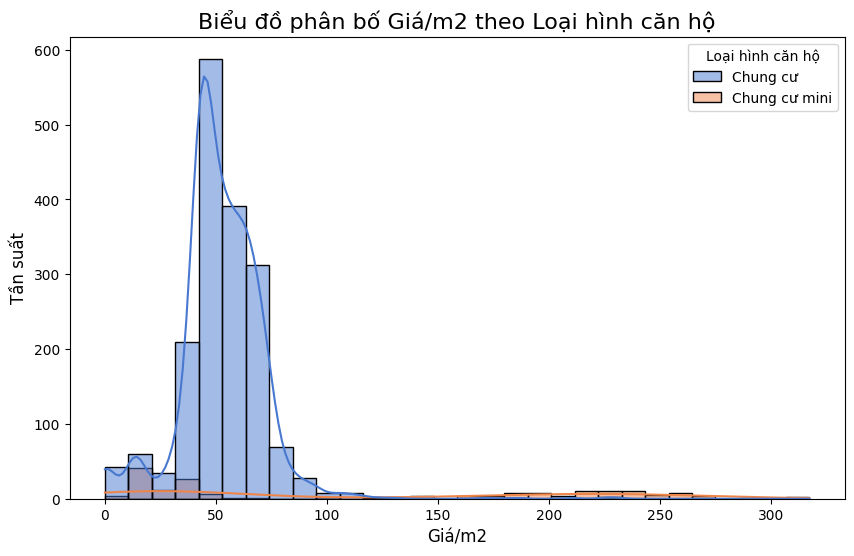

In [11]:
import seaborn as sns   

# Lọc các loại hình căn hộ "Chung cư mini" và "Chung cư"
df_filtered = df[df['Loại hình căn hộ'].isin(['Chung cư mini', 'Chung cư'])]

# Vẽ biểu đồ phân bố cho từng loại hình căn hộ
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='Giá/m²', hue='Loại hình căn hộ', kde=True, bins=30, palette='muted')

# Thiết lập tiêu đề và nhãn cho các trục
plt.title('Biểu đồ phân bố Giá/m2 theo Loại hình căn hộ', fontsize=16)
plt.xlabel('Giá/m2', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)

# Hiển thị biểu đồ
plt.show()

In [26]:
df_mean2 = df.groupby('Giấy tờ pháp lý')['Giá/m²'].mean().reset_index()

df_mean_sort = df_mean2.sort_values(by='Giá/m²', ascending=False)

top10 = df_mean_sort.head(10)

fig = px.bar(top10, x='Giấy tờ pháp lý', y='Giá/m²', color='Giấy tờ pháp lý',
             labels={'Giấy tờ pháp lý': 'Giấy tờ pháp lý', 'Giá/m²': 'Giá/m²'},
             title='Phụ thuộc giá vào Giấy tờ pháp lý ')
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()